In [1]:
# Import numpy and matplotlib
from collections import namedtuple
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import simps
from glob import glob
import os
from tqdm.notebook import tqdm, trange

# Modify the style of the plots
plt.style.use('seaborn-whitegrid')

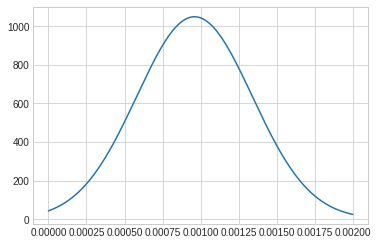

In [6]:
mean_speed = 0.96 * 1e-3
std_dev_speed = 0.38 * 1e-3
Vmin = mean_speed - 2*std_dev_speed
Vmax = mean_speed + 2*std_dev_speed
speed_distribution = lambda v: np.exp(-0.5*((v - mean_speed)/std_dev_speed)**2) / (std_dev_speed*np.sqrt(2*np.pi))

v = np.linspace(0, 2e-3, 1001)
plt.plot(v, speed_distribution(v))

# Convergence plots for Case 1 -- Lagrangian

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

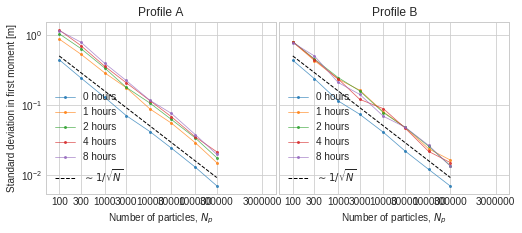

In [45]:
# Total integration time
Tmax = 12*3600
# Max depth of simulation domain
Zmax = 50
# Save interval
dt_save = 1800
# Folder where the data are stored
datafolder = '../results/'

# Numerical parameters
dt    = 10    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000, 300000])  # Number of particles
#Np_ref = 3000000

# Hours after which to plot the solutions
hours = [0, 1, 2, 4, 8]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns)) - 999

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(os.path.join(datafolder, f'Case1_K_{profile}_lagrangian_Nparticles={Np}_dt={dt}_Z_*.npy'))

        for i, datafile in tqdm(enumerate(datafiles), total = len(datafiles)):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt_save)
                moments[iplot, n, j, i] = np.mean(data[it,:][data[it,:] >= 0])

    for j, hour in enumerate(hours):
        moments_subset = np.zeros(len(Nps))
        for n in range(len(Nps)):
            moments_subset[n] = np.std(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0])
        ax[iplot].plot(Nps, moments_subset, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 5 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 3000000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_case1.pdf')

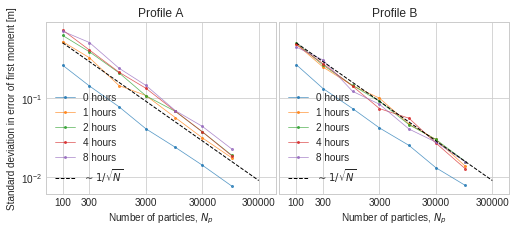

In [48]:
# Hours after which to plot the solutions
hours = [0, 1, 2, 4, 8]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for j, hour in enumerate(hours):
        errors = np.zeros(len(Nps)-1)
        moment_ref = np.mean(moments[iplot, -1, j, :])
        for n in range(len(Nps[:-1])):
            errors[n] = np.std(np.abs(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0] - moment_ref))
        ax[iplot].plot(Nps[:-1], errors, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 5 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 3000, 30000, 300000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in error of first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_stddev_error_case1.pdf')

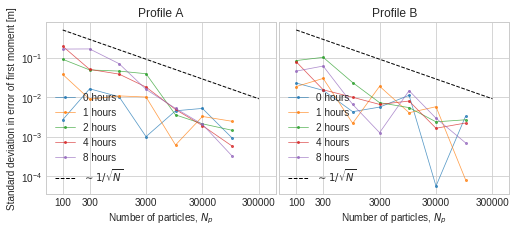

In [49]:
# Hours after which to plot the solutions
hours = [0, 1, 2, 4, 8]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for j, hour in enumerate(hours):
        errors = np.zeros(len(Nps)-1)
        moment_ref = np.mean(moments[iplot, -1, j, :])
        for n in range(len(Nps[:-1])):
#            errors[n] = np.mean(np.abs(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0]) - moment_ref)
            errors[n] = np.abs(np.mean(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0]) - moment_ref)
        ax[iplot].plot(Nps[:-1], errors, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 5 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 3000, 30000, 300000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in error of first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_mean_error_case1.pdf')

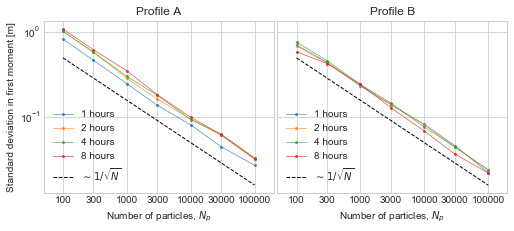

In [28]:
# Total integration time
Tmax = 8*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters
dt    = 30    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000])  # Number of particles

# Hours after which to plot the solutions
hours = [1, 2, 4, 8]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns))

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(f'../../data/Case1_K_{profile}_Lagrangian_moment_Np={Np}_dt={dt}_*.npy')

        for i, datafile in enumerate(datafiles):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt)
                moments[iplot, n, j, i] = data[it]

    for j, hour in enumerate(hours):
        ax[iplot].plot(Nps, np.std(moments[iplot, :, j, :], axis = 1), marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 5 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_case1.pdf')

# Convergence plots for Case 2 -- Lagrangian

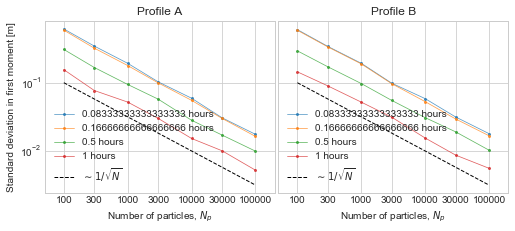

In [18]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters
dt    = 30    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000])  # Number of particles

# Hours after which to plot the solutions
hours = [5/60, 10/60, 30/60, 1]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns))

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(f'../../data/Case2_K_{profile}_Lagrangian_moment_Np={Np}_dt={dt}_*.npy')

        for i, datafile in enumerate(datafiles):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt)
                moments[iplot, n, j, i] = data[it]

    for j, hour in enumerate(hours):
        ax[iplot].plot(Nps, np.std(moments[iplot, :, j, :], axis = 1), marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 1 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_case2.pdf')

# Case 3

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

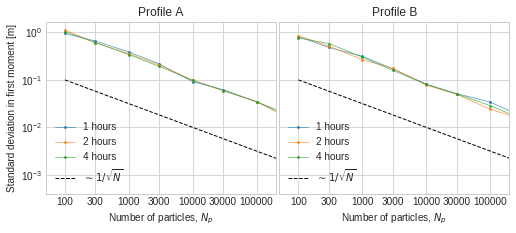

In [51]:
# Total integration time
Tmax = 12*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters
dt_save = 1800
dt    = 2    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 3000000])  # Number of particles

# Hours after which to plot the solutions
hours = [1, 2, 4]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns))

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(f'/mnt/SSD2/EulerLagrange/Case3_K_{profile}_lagrangian_Nparticles={Np}_dt={dt}_Z_*.npy')

        for i, datafile in tqdm(enumerate(datafiles), total = len(datafiles)):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt_save)
                moments[iplot, n, j, i] = np.mean(data[it][data[it] > -999])

    for j, hour in enumerate(hours):
        ax[iplot].plot(Nps, np.std(moments[iplot, :, j, :], axis = 1), marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 1 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_case3.pdf')

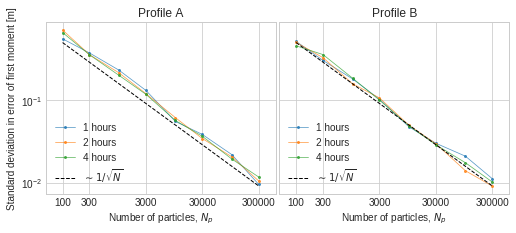

In [52]:
# Hours after which to plot the solutions
hours = [1, 2, 4]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for j, hour in enumerate(hours):
        errors = np.zeros(len(Nps)-1)
        moment_ref = np.mean(moments[iplot, -1, j, :])
        for n in range(len(Nps[:-1])):
            errors[n] = np.std(np.abs(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0] - moment_ref))
        ax[iplot].plot(Nps[:-1], errors, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps[:-1], 5 / np.sqrt(Nps[:-1]), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 3000, 30000, 300000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in error of first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_stddev_error_case3.pdf')

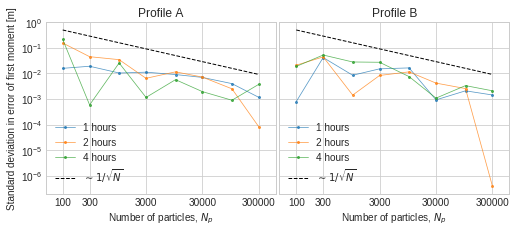

In [53]:
# Hours after which to plot the solutions
hours = [1, 2, 4]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for j, hour in enumerate(hours):
        errors = np.zeros(len(Nps)-1)
        moment_ref = np.mean(moments[iplot, -1, j, :])
        for n in range(len(Nps[:-1])):
#            errors[n] = np.mean(np.abs(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0] - moment_ref))
            errors[n] = np.abs(np.mean(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0]) - moment_ref)
        ax[iplot].plot(Nps[:-1], errors, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps[:-1], 5 / np.sqrt(Nps[:-1]), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 3000, 30000, 300000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in error of first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_error_case3.pdf')

# Case 4

In [9]:
# Total integration time
Tmax = 24*3600
# Max depth of simulation domain
Zmax = 50
# Save interval
dt_save = 1800
# Folder where the data are stored
datafolder = '../results/'

# Numerical parameters
dt    = 5    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000])  # Number of particles
#Np_ref = 3000000

# Hours after which to plot the solutions
hours = [1, 2, 4, 8]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns)) - 999

for iplot, profile in enumerate(['A', 'B']):
    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(os.path.join(datafolder, f'Case4_K_{profile}_lagrangian_Nparticles={Np}_dt={dt}_Z_*.npy'))
        for i, datafile in tqdm(enumerate(datafiles)):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt_save)
                moments[iplot, n, j, i] = np.mean(data[it,:][data[it,:] >= 0])

75it [00:00, 1338.93it/s]
75it [00:00, 1311.68it/s]
75it [00:00, 1311.40it/s]
75it [00:00, 1260.75it/s]
75it [00:00, 407.69it/s]
73it [00:00, 197.85it/s]
70it [00:02, 18.55it/s]
75it [00:00, 1250.45it/s]
75it [00:00, 868.86it/s]
75it [00:00, 614.62it/s]
75it [00:00, 611.61it/s]
75it [00:00, 225.00it/s]
71it [00:00, 92.85it/s] 
70it [00:03, 22.85it/s]


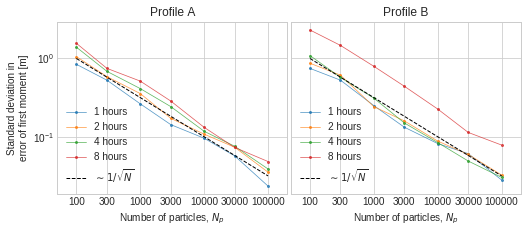

In [14]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    for j, hour in enumerate(hours):
        errors = np.zeros(len(Nps))
        moment_ref = np.mean(moments[iplot, -1, j, :])
        for n in range(len(Nps[:])):
            errors[n] = np.std(np.abs(moments[iplot, n, j, :][moments[iplot, n, j, :] >= 0] - moment_ref))
        ax[iplot].plot(Nps[:], errors, marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{hour} hours')

    ax[iplot].plot(Nps, 10 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[iplot].set_title(f'Profile {profile}')
    
ax[0].set_xlabel('Number of particles, $N_p$')
ax[1].set_xlabel('Number of particles, $N_p$')
ax[0].set_ylabel('Standard deviation in\nerror of first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nparticles_case4.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


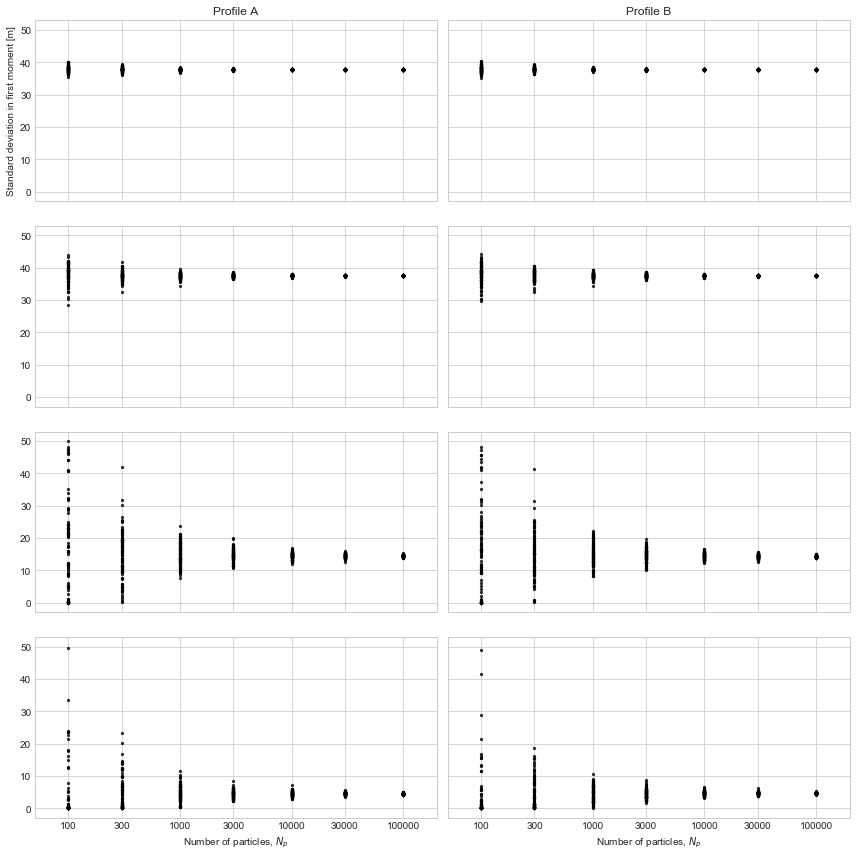

In [46]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters
dt    = 10    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000])  # Number of particles

# Hours after which to plot the solutions
hours = [5/60, 10/60, 30/60, 1]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns))
moments_ref = np.zeros((2, len(hours)))

fig, ax = plt.subplots(ncols = 2, nrows = len(hours), figsize = (12, 12), sharex = True, sharey = True)

for iplot, profile in enumerate(['A', 'B']):
    
    NK_ref = 512
    dt_ref = 1.0
    Cg_ref = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={NK_ref+1}_NJ=4000_dt={dt_ref}.npy').sum(axis=2)
    
    # Concentration grid cells (in z-direction)
    Nz_grid, Nt_grid = Cg_ref.shape
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2
    times_grid = np.linspace(0, Tmax, Nt_grid)

    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(f'../../data/Case2_K_{profile}_Lagrangian_moment_Np={Np}_dt={dt}_*.npy')

        for i, datafile in enumerate(datafiles):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt)
                moments[iplot, n, j, i] = data[it]

    for j, hour in enumerate(hours):
        it = np.argmin(np.abs(times_grid - hour*3600))
        moments_ref[iplot, j] = dz_grid * np.sum(mid_grid * Cg_ref[:,it]) / (dz_grid * np.sum(Cg_ref[:,it]))

        for i in range(len(datafiles)):
            #ax[j,iplot].scatter(Nps, np.abs(moments[iplot, :, j, i] - moments_ref[iplot,j]), marker = '.', s = 20, alpha = 0.75, c = 'k')
            ax[j,iplot].scatter(Nps, moments[iplot, :, j, i], marker = '.', s = 20, alpha = 0.75, c = 'k')

    #ax[iplot].plot(Nps, 1 / np.sqrt(Nps), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
    
    ax[0,iplot].legend(loc = 'lower left')
    ax[0,iplot].set_xscale('log')
#    ax[0,iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[0,iplot].set_xticks(ticks)
    ax[0,iplot].set_xticklabels(ticks)
    ax[0,iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[0,iplot].set_title(f'Profile {profile}')
    
ax[-1,0].set_xlabel('Number of particles, $N_p$')
ax[-1,1].set_xlabel('Number of particles, $N_p$')
ax[0,0].set_ylabel('Standard deviation in first moment [m]')

plt.tight_layout()
#plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nparticles_case2.pdf')

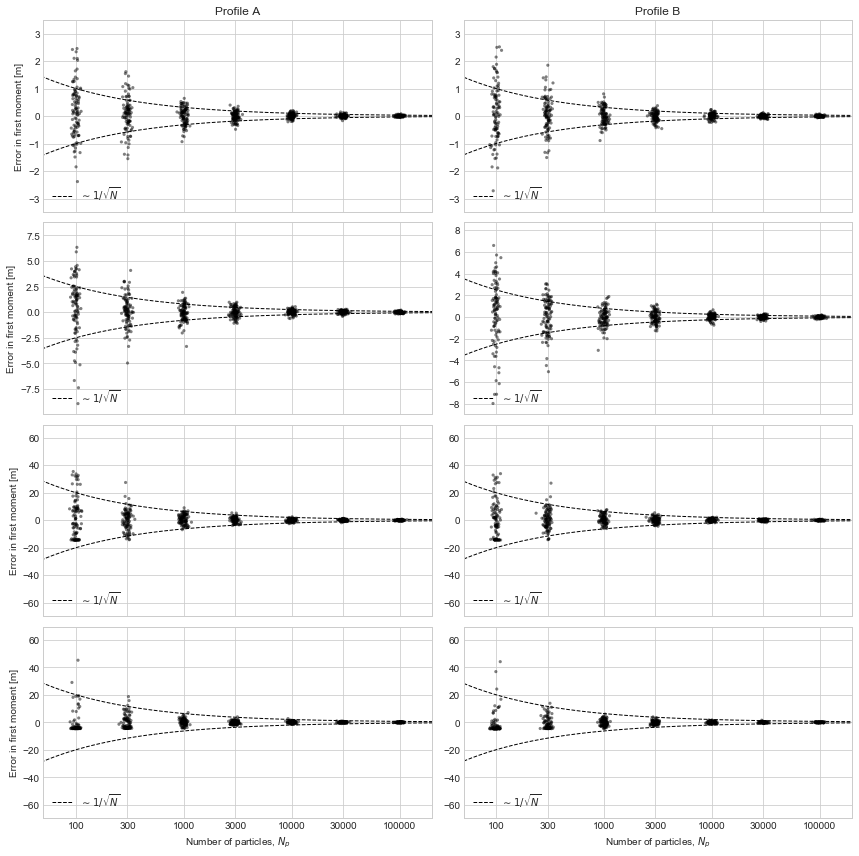

In [60]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters
dt    = 10    # Timestep
Nruns = 100
Nps   = np.array([100, 300, 1000, 3000, 10000, 30000, 100000])  # Number of particles

# Hours after which to plot the solutions
hours = [5/60, 10/60, 30/60, 1]

# Array to hold data for plotting:
moments = np.zeros((2, len(Nps), len(hours), Nruns))
moments_ref = np.zeros((2, len(hours)))

fig, ax = plt.subplots(ncols = 2, nrows = len(hours), figsize = (12, 12), sharex = True)

for iplot, profile in enumerate(['A', 'B']):
    
    NK_ref = 512
    dt_ref = 1.0
    Cg_ref = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={NK_ref+1}_NJ=4000_dt={dt_ref}.npy').sum(axis=2)
    
    # Concentration grid cells (in z-direction)
    Nz_grid, Nt_grid = Cg_ref.shape
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2
    times_grid = np.linspace(0, Tmax, Nt_grid)

    for n, Np in enumerate(Nps):
        # Files with stored results (first moments)
        datafiles = glob(f'../../data/Case2_K_{profile}_Lagrangian_moment_Np={Np}_dt={dt}_*.npy')

        for i, datafile in enumerate(datafiles):
            data = np.load(datafile)
            for j, hour in enumerate(hours):
                it = int(hour*3600/dt)
                moments[iplot, n, j, i] = data[it]

    for j, hour in enumerate(hours):
        it = np.argmin(np.abs(times_grid - hour*3600))
        moments_ref[iplot, j] = dz_grid * np.sum(mid_grid * Cg_ref[:,it]) / (dz_grid * np.sum(Cg_ref[:,it]))

        for i in range(len(datafiles)):
            #ax[j,iplot].scatter(Nps, np.abs(moments[iplot, :, j, i] - moments_ref[iplot,j]), marker = '.', s = 20, alpha = 0.75, c = 'k')
            offset = np.random.normal(loc = 0, scale = np.array(Nps/20), size = len(Nps))
            ax[j,iplot].scatter(Nps + offset, moments[iplot, :, j, i] - moments_ref[iplot,j], marker = '.', s = 40, alpha = 0.5, fc = 'k', edgecolor = '')

        tmp = np.logspace(1, 6, 1000)
        prefactors = [10, 25, 200, 200]
        ax[j,iplot].plot(tmp,  prefactors[j] / np.sqrt(tmp), '--', c = 'k', lw = 1, label = '$\sim 1/\sqrt{N}$')
        ax[j,iplot].plot(tmp, -prefactors[j] / np.sqrt(tmp), '--', c = 'k', lw = 1)
    
        ax[j,iplot].legend(loc = 'lower left')
    ax[0,iplot].set_xscale('log')
#    ax[0,iplot].set_yscale('log')

    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    ax[0,iplot].set_xticks(ticks)
    ax[0,iplot].set_xticklabels(ticks)
    ax[0,iplot].set_xlim(0.5*ticks[0], 2*ticks[-1])
    ax[0,iplot].set_title(f'Profile {profile}')
    
ax[-1,0].set_xlabel('Number of particles, $N_p$')
ax[-1,1].set_xlabel('Number of particles, $N_p$')
for i in range(len(hours)):
    ax[i,0].set_ylabel('Error in first moment [m]')

plt.tight_layout()
#plt.subplots_adjust(left = 0.075, bottom = 0.125, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nparticles_case2.pdf')

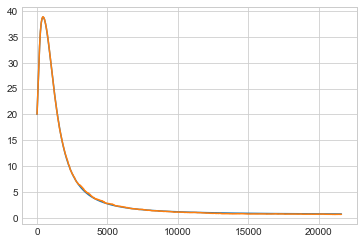

In [39]:
NK_ref = 512
dt_ref = 1.0
profile = 'A'
#Cg_ref = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={NK_ref+1}_NJ=4000_dt={dt_ref}.npy').sum(axis=2)

# Concentration grid cells (in z-direction)
Nz_grid, Nt_grid = Cg_ref.shape
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2
times_grid = np.linspace(0, Tmax, Nt_grid)

plt.plot(times_grid, dz_grid*np.sum(mid_grid[:,None]*Cg_ref, axis = 0)/(dz_grid*np.sum(Cg_ref, axis = 0)))

moments = np.load('../../data/Case2_K_A_Lagrangian_moment_Np=100000_dt=10_0000.npy')
times_part = np.linspace(0, Tmax, moments.shape[0])
plt.plot(times_part, moments)

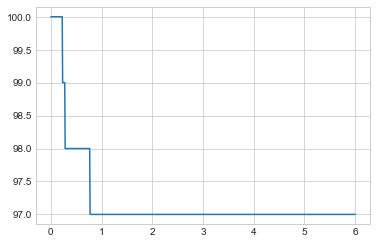

In [28]:
c = np.load('../../data/Case2_K_A_Lagrangian_concentration_Np=100_dt=30_0000.npy')
plt.plot(np.linspace(0, 6*3600, c.shape[0]) / 3600, np.sum(c, axis = 1))

(50, 0)

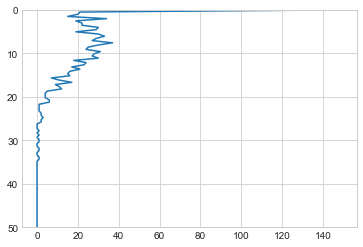

In [29]:
c = np.load('../../data/Case2_K_A_Lagrangian_concentration_Np=1000_dt=30_0000.npy')
plt.plot(c[5,:], np.linspace(0, 50, 100))
plt.ylim(50, 0)

In [17]:
c[500,:]

array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.histogram(np.zeros(10), bins = np.linspace(0, 1, 10))

(array([10,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]))

361
361


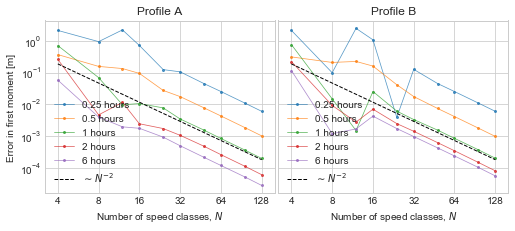

In [61]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters for reference solution
dt_ref = 1.0    # Timestep
NJ_ref = 4000  # Number of spatial grid cells
NK_ref = 512   # Number of classes

# Varying numerical parameters
dts = np.array([60, 120, 300])
NJs = np.array([4000])
NKs = np.array([1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128])
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 96, 128])

# Hours after which to plot the solutions
hours = [15/60, 30/60, 1, 2, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, profile in enumerate(['A', 'B']):
    
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={NK_ref+1}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 2)
    # Concentration grid cell faces (in z-direction)
    Nz_grid_ref, Nt_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NKs)) for h in hours]
    for i, n in enumerate(NKs):

        Cg = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={n+1}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 2)

        # Concentration grid cells (in z-direction)
        Nz_grid, Nt_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[:,int(60*h)])
            moment = dz_grid     * np.sum(mid_grid     * Cg[:,int(60*h)])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NKs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NKs, 3*NKs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [4, 8, 16, 32, 64, 128]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'Profile {profile}')

    
ax[0].set_xlabel('Number of speed classes, $N$')
ax[1].set_xlabel('Number of speed classes, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nclasses_case2.pdf')
plt.savefig('convergence_Nclasses_case2.png', dpi = 180)


361


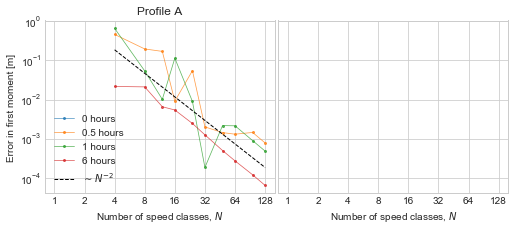

In [16]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50

# Numerical parameters for reference solution
dt_ref = 1.0    # Timestep
NJ_ref = 4000  # Number of spatial grid cells
NK_ref = 512   # Number of classes

# Varying numerical parameters
dts = np.array([60, 120, 300])
NJs = np.array([4000])
NKs = np.array([1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128])
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 96, 128])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, profile in enumerate(['A']):
    
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={NK_ref+1}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 2)
    # Concentration grid cell faces (in z-direction)
    Nz_grid_ref, Nt_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NKs)) for h in hours]
    for i, n in enumerate(NKs):

        Cg = np.load(f'../../data/Case2_K_{profile}_block_Nclasses={n+1}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 2)

        # Concentration grid cells (in z-direction)
        Nz_grid, Nt_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[:,int(60*h)])
            moment = dz_grid     * np.sum(mid_grid     * Cg[:,int(60*h)])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NKs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NKs, 3*NKs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [1, 2, 4, 8, 16, 32, 64, 128]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*1, ticks[-1]/0.8)
    ax[iplot].set_title(f'Profile {profile}')

    
ax[0].set_xlabel('Number of speed classes, $N$')
ax[1].set_xlabel('Number of speed classes, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
plt.savefig('convergence_Nclasses_case2.pdf')


In [4]:
C_new = np.load('../data/Case3_K_A_block_Nclasses=32_NJ=1000_dt=60.npy')
C_old = np.load('../data/Case3_K_A_block_Nclasses=32_NJ=1000_dt=60_old_code.npy')

print(C_new.shape)
print(C_old.shape)

(49, 32, 1000)
(1000, 37, 32)


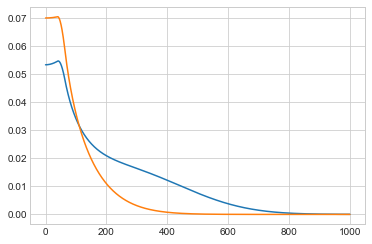

In [7]:
plt.plot(np.sum(C_new, axis = 1)[2,:])
plt.plot(np.sum(C_old, axis = 2)[:,8])

(25, 4000)
4000


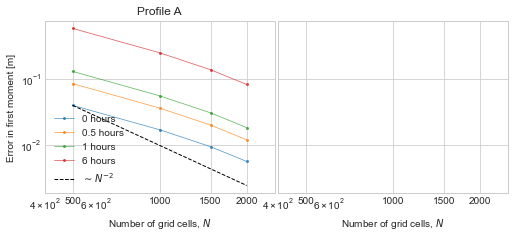

In [17]:
# Total integration time
Tmax = 12*3600
# Max depth of simulation domain
Zmax = 50
folder = '../testresults'
case = 'Case4'

# Numerical parameters for reference solution
dt_ref = 120.0    # Timestep
NJ_ref = 4000  # Number of spatial grid cells
NK_ref = 16   # Number of classes

# Varying numerical parameters
NJs = np.array([500, 1000, 1500, 2000])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, profile in enumerate(['A']):
    
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 1)
    print(Cg_ref.shape)
    # Concentration grid cell faces (in z-direction)
    Nz_grid_ref, Nt_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NJs)) for h in hours]
    for i, n in enumerate(NJs):

        Cg = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={n}_dt={dt_ref}.npy').sum(axis = 1)

        # Concentration grid cells (in z-direction)
        Nz_grid, Nt_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[:,int(2*h)])
            moment = dz_grid     * np.sum(mid_grid     * Cg[:,int(2*h)])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NJs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NJs, 1e4*NJs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [500, 1000, 1500, 2000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'Profile {profile}')

    
ax[0].set_xlabel('Number of grid cells, $N$')
ax[1].set_xlabel('Number of grid cells, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nclasses_case2.pdf')


(25, 16)
16


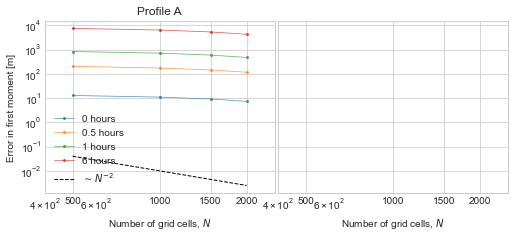

In [39]:
# Total integration time
Tmax = 12*3600
# Max depth of simulation domain
Zmax = 50
folder = '../testresults_umist'
case = 'Case4'

# Numerical parameters for reference solution
dt_ref = 120.0    # Timestep
NJ_ref = 4000  # Number of spatial grid cells
NK_ref = 16   # Number of classes

# Varying numerical parameters
NJs = np.array([500, 1000, 1500, 2000])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, profile in enumerate(['A']):
    
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={NJ_ref}_dt={dt_ref}.npy').sum(axis = 1)
    print(Cg_ref.shape)
    # Concentration grid cell faces (in z-direction)
    Nz_grid_ref, Nt_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NJs)) for h in hours]
    for i, n in enumerate(NJs):

        Cg = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={n}_dt={dt_ref}.npy').sum(axis = 1)

        # Concentration grid cells (in z-direction)
        Nz_grid, Nt_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[:,int(2*h)])
            moment = dz_grid     * np.sum(mid_grid     * Cg[:,int(2*h)])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NJs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NJs, 1e4*NJs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [500, 1000, 1500, 2000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'Profile {profile}')

    
ax[0].set_xlabel('Number of grid cells, $N$')
ax[1].set_xlabel('Number of grid cells, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nclasses_case2.pdf')


In [32]:
C = np.load('../testresults/Case3_K_A_block_Nclasses=32_NJ=1000_dt=60.npy')

C_old = np.transpose(np.load('../testresults/Case3_K_A_block_Nclasses=32_NJ=1000_dt=60_old_code.npy'),  axes = (1, 2, 0))


In [37]:
C_old = np.load('../testresults/Case3_K_A_block_Nclasses=32_NJ=1000_dt=60_old_code.npy')

print(C_old.shape)


(1000, 13, 32)


False

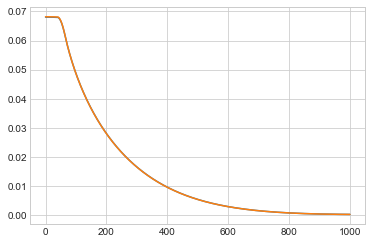

In [33]:
plt.plot(np.sum(C[-1,:,:], axis = 0))
plt.plot(np.sum(C_old[-1,:,:], axis = 0))

np.allclose(np.sum(C_old[-1,:,:], axis = 0), np.sum(C[-1,:,:], axis = 0))

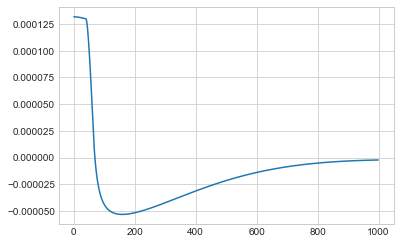

In [36]:
plt.plot( np.sum(C_old[-1,:,:], axis = 0) - np.sum(C[-1,:,:], axis = 0))

(4000, 13)
13


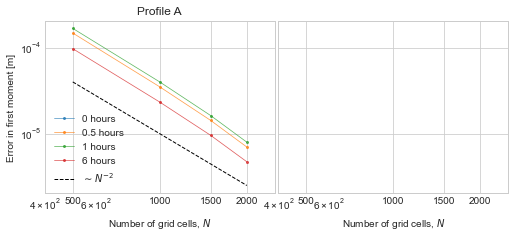

In [42]:
# Total integration time
Tmax = 12*3600
# Max depth of simulation domain
Zmax = 50
folder = '../testresults'
case = 'Case3'

# Numerical parameters for reference solution
dt_ref = 60    # Timestep
NJ_ref = 4000  # Number of spatial grid cells
NK_ref = 32   # Number of classes

# Varying numerical parameters
NJs = np.array([500, 1000, 1500, 2000])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, profile in enumerate(['A']):
    
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={NJ_ref}_dt={dt_ref}_old_code.npy').sum(axis = 2)
    print(Cg_ref.shape)
    # Concentration grid cell faces (in z-direction)
    Nz_grid_ref, Nt_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NJs)) for h in hours]
    for i, n in enumerate(NJs):

        Cg = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={n}_dt={dt_ref}_old_code.npy').sum(axis = 2)

        # Concentration grid cells (in z-direction)
        Nz_grid, Nt_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[:,int(2*h)])
            moment = dz_grid     * np.sum(mid_grid     * Cg[:,int(2*h)])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NJs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NJs, 1e1*NJs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [500, 1000, 1500, 2000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'Profile {profile}')

    
ax[0].set_xlabel('Number of grid cells, $N$')
ax[1].set_xlabel('Number of grid cells, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nclasses_case2.pdf')


(13, 8000)
13
(13, 8000)
13


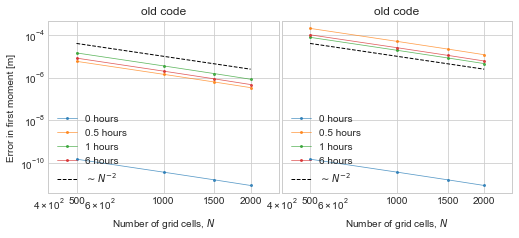

In [77]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50
folder = '../debug/'
case = 'Case3'

# Numerical parameters for reference solution
dt_ref = 10    # Timestep
NJ_ref = 8000  # Number of spatial grid cells
NK_ref = 8   # Number of classes
profile = 'A'

# Varying numerical parameters
NJs = np.array([500, 1000, 1500, 2000])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, case in enumerate(('Case1', 'Case3')):
    if version == 'old':
        suffix = '_old'
    else:
        suffix = '_old'
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={NJ_ref}_dt={dt_ref}{suffix}.npy').sum(axis = 1)
    print(Cg_ref.shape)
    # Concentration grid cell faces (in z-direction)
    Nt_grid_ref, Nz_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NJs)) for h in hours]
    for i, n in enumerate(NJs):

        Cg = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={n}_dt={dt_ref}{suffix}.npy').sum(axis = 1)

        # Concentration grid cells (in z-direction)
        Nt_grid, Nz_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[int(2*h),:])
            moment = dz_grid     * np.sum(mid_grid     * Cg[int(2*h),:])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NJs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NJs, 1e1*NJs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [500, 1000, 1500, 2000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'{version} code')


ax[0].set_xlabel('Number of grid cells, $N$')
ax[1].set_xlabel('Number of grid cells, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nclasses_case2.pdf')


(13, 8, 500)
(13, 8, 500)
First moment, case 1 =  20.000000213999677
First moment, case 3 =  20.000000213999677
(13, 8, 1000)
(13, 8, 1000)
First moment, case 1 =  20.000000213883716
First moment, case 3 =  20.000000213883723
(13, 8, 1500)
(13, 8, 1500)
First moment, case 1 =  20.000000213862215
First moment, case 3 =  20.000000213862222
(13, 8, 2000)
(13, 8, 2000)
First moment, case 1 =  20.00000021385469
First moment, case 3 =  20.00000021385469
(13, 8, 8000)
(13, 8, 8000)
First moment, case 1 =  20.000000213845613
First moment, case 3 =  20.000000213845617


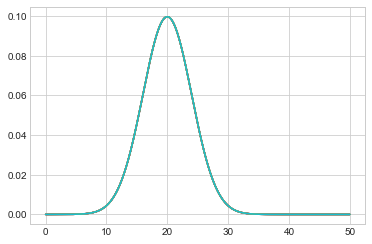

In [73]:
M1_1 = []
M1_3 = []

for NJ in [500, 1000, 1500, 2000, 8000]:
    print(np.load(f'../debug/Case1_K_A_block_Nclasses=8_NJ={NJ}_dt=10_old.npy').shape)
    print(np.load(f'../debug/Case3_K_A_block_Nclasses=8_NJ={NJ}_dt=10_old.npy').shape)
    C0_1 = np.load(f'../debug/Case1_K_A_block_Nclasses=8_NJ={NJ}_dt=10_old.npy')[0,:,:]
    C0_3 = np.load(f'../debug/Case3_K_A_block_Nclasses=8_NJ={NJ}_dt=10_old.npy')[0,:,:]

    zf, dz = np.linspace(0, 50, C0_1.shape[1]+1, retstep = True)
    zc = zf[:-1] + dz/2

    plt.plot(zc, np.sum(C0_1, axis = 0))
    plt.plot(zc, np.sum(C0_3, axis = 0))

    print('First moment, case 1 = ', np.sum(dz*zc*np.sum(C0_1, axis = 0)))
    print('First moment, case 3 = ', np.sum(dz*zc*np.sum(C0_3, axis = 0)))
    
    M1_1.append(np.sum(dz*zc*np.sum(C0_1, axis = 0)))
    M1_3.append(np.sum(dz*zc*np.sum(C0_3, axis = 0)))
    
M1_1 = np.array(M1_1)
M1_3 = np.array(M1_3)

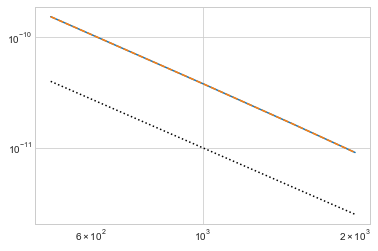

In [72]:
NJs = np.array([500, 1000, 1500, 2000])

plt.plot(NJs, np.abs(M1_1[:-1] - M1_1[-1]))
plt.plot(NJs, np.abs(M1_3[:-1] - M1_3[-1]), '--')

plt.plot(NJs, 1e-5/NJs**2, ':', c = 'k')

plt.xscale('log')
plt.yscale('log')

First moment, case 1 =  20.000000213999677
First moment, case 3 =  20.000000213999677
First moment, case 1 =  20.000000213883716
First moment, case 3 =  20.000000213883716
First moment, case 1 =  20.000000213862215
First moment, case 3 =  20.000000213862215
First moment, case 1 =  20.00000021385469
First moment, case 3 =  20.00000021385469
First moment, case 1 =  20.000000213845613
First moment, case 3 =  20.000000213845613


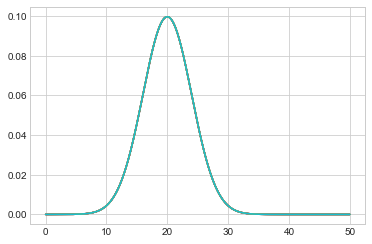

In [55]:
M1_1 = []
M1_3 = []

for NJ in [500, 1000, 1500, 2000, 8000]:
    C0_1 = np.load(f'../debug/C0_case1_Nclasses=8_NJ={NJ}_old.npy')
    C0_3 = np.load(f'../debug/C0_case1_Nclasses=8_NJ={NJ}_old.npy')

    zf, dz = np.linspace(0, 50, C0_1.shape[0]+1, retstep = True)
    zc = zf[:-1] + dz/2

    plt.plot(zc, np.sum(C0_1, axis = 1))
    plt.plot(zc, np.sum(C0_3, axis = 1))

    print('First moment, case 1 = ', np.sum(dz*zc*np.sum(C0_1, axis = 1)))
    print('First moment, case 3 = ', np.sum(dz*zc*np.sum(C0_3, axis = 1)))
    
    M1_1.append(np.sum(dz*zc*np.sum(C0_1, axis = 1)))
    M1_3.append(np.sum(dz*zc*np.sum(C0_3, axis = 1)))
    
M1_1 = np.array(M1_1)
M1_3 = np.array(M1_3)

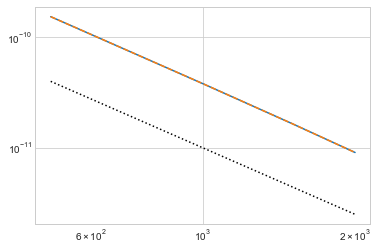

In [65]:
NJs = np.array([500, 1000, 1500, 2000])

plt.plot(NJs, np.abs(M1_1[:-1] - M1_1[-1]))
plt.plot(NJs, np.abs(M1_3[:-1] - M1_3[-1]), '--')

plt.plot(NJs, 1e-5/NJs**2, ':', c = 'k')

plt.xscale('log')
plt.yscale('log')

(0.0, 0.5)

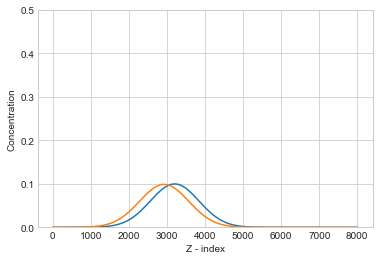

In [168]:
C = np.load('../debug/Case1_K_A_block_Nclasses=8_NJ=8000_dt=10.npy')
plt.plot(np.sum(C, axis = 1)[0,:])
plt.plot(np.sum(C, axis = 1)[1,:])
#plt.plot(np.sum(C, axis = 1)[2,:])
#plt.plot(np.sum(C, axis = 1)[-1,:])
plt.xlabel('Z - index')
plt.ylabel('Concentration')
plt.ylim(0, 0.5)

(13, 8, 8000)


(0.0, 0.5)

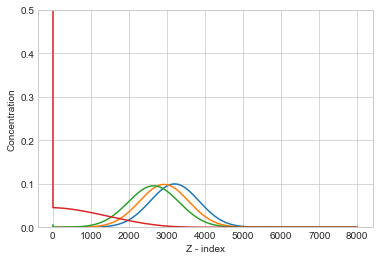

In [165]:
C = np.load('../debug/Case1_K_A_block_Nclasses=8_NJ=8000_dt=10_old.npy')
print(C.shape)
plt.plot(np.sum(C, axis = 1)[0,:])
plt.plot(np.sum(C, axis = 1)[1,:])
plt.plot(np.sum(C, axis = 1)[2,:])
plt.plot(np.sum(C, axis = 1)[-1,:])
plt.xlabel('Z - index')
plt.ylabel('Concentration')
plt.ylim(0, 0.5)

(13, 8, 2000)


Text(0, 0.5, 'Concentration')

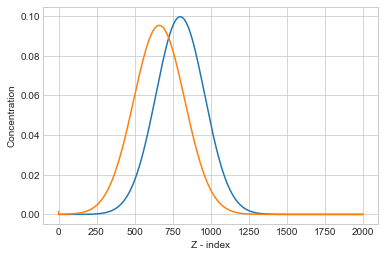

In [156]:
C = np.load('../debug/Case1_K_A_block_Nclasses=8_NJ=2000_dt=10_copy.npy')
print(C.shape)
plt.plot(np.sum(C, axis = 1)[0,:])
plt.plot(np.sum(C, axis = 1)[2,:])
#plt.plot(np.sum(C, axis = 1)[-1,:])
plt.xlabel('Z - index')
plt.ylabel('Concentration')

(361, 8, 2000)


Text(0, 0.5, 'Concentration')

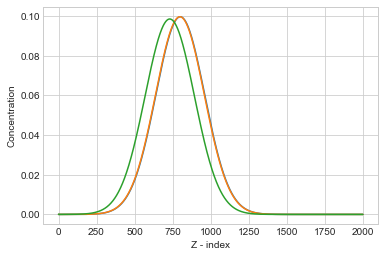

In [154]:
C = np.load('../debug/Case1_K_A_block_Nclasses=8_NJ=2000_dt=10.npy')
print(C.shape)
plt.plot(np.sum(C, axis = 1)[0,:])
plt.plot(np.sum(C, axis = 1)[1,:])
plt.plot(np.sum(C, axis = 1)[30,:])
#plt.plot(np.sum(C, axis = 1)[-1,:])
plt.xlabel('Z - index')
plt.ylabel('Concentration')

In [128]:
FL_new = np.load('../debug/flux_limiter_new.npy')
FL_old = np.load('../debug/flux_limiter_old.npy')

print(FL_new.shape, FL_old.shape)

(64000,) (8000, 8)


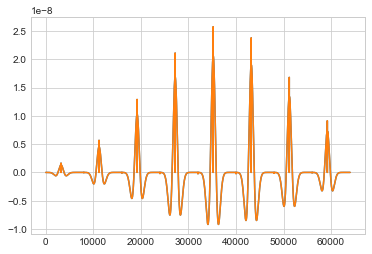

In [129]:
plt.plot(FL_new)
plt.plot(FL_old[:].T.flatten())

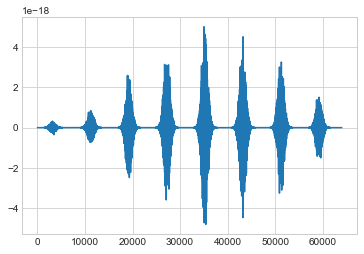

In [132]:
plt.plot(FL_new - FL_old[:].T.flatten())

(0.0, 10.0)

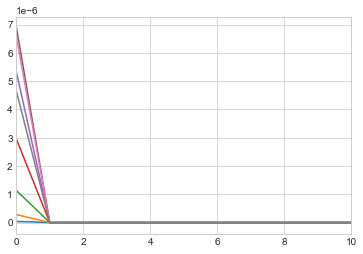

In [117]:
for i in range(8):
    plt.plot(FL_new[i*8000:(i+1)*8000])
    
plt.xlim(0, 10)


In [108]:
np.amax(np.abs(FL_old[:,::-1].T.flatten()/2 - FL_new))

1.9145591585907357e-18

In [92]:
C0_old = np.load('../scripts/C0_old.npy')
C0_new = np.load('../scripts/C0_new.npy')

print(C0_new.shape, C0_old.shape)

(8, 2000) (2000, 8)


In [93]:
np.allclose(C0_new.T, C0_old)

True

In [94]:
np.amax(np.abs(C0_new.T - C0_old))

6.755013215453687e-15

(13, 8000)
13
(13, 8000)
13


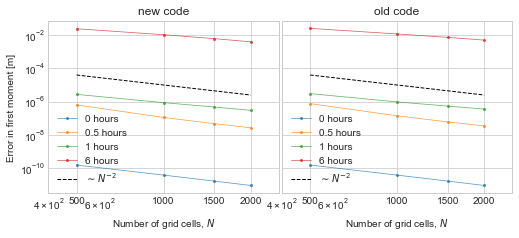

In [194]:
# Total integration time
Tmax = 6*3600
# Max depth of simulation domain
Zmax = 50
folder = '../debug/'
case = 'Case1'

# Numerical parameters for reference solution
dt_ref = 10    # Timestep
NJ_ref = 8000  # Number of spatial grid cells
NK_ref = 8   # Number of classes
profile = 'A'

# Varying numerical parameters
NJs = np.array([500, 1000, 1500, 2000])

# Hours after which to plot the solutions
hours = [0, 0.5, 1, 6]

fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharex = True, sharey = True)
for iplot, version in enumerate(('new', 'old')):
    if version == 'old':
        suffix = '_old'
    else:
        suffix = ''
    #### Reference solution  ####
    # Load data, and work out grid parameters
    Cg_ref = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={NJ_ref}_dt={dt_ref}{suffix}.npy').sum(axis = 1)
    print(Cg_ref.shape)
    # Concentration grid cell faces (in z-direction)
    Nt_grid_ref, Nz_grid_ref = Cg_ref.shape
    zc_grid_ref  = np.linspace(0, Zmax, Nz_grid_ref + 1)
    # Concentration grid cell spacing
    dz_grid_ref  = zc_grid_ref[1] - zc_grid_ref[0]
    # Concentration grid cell midpoints
    mid_grid_ref = zc_grid_ref[:-1] + dz_grid_ref/2
    
    print(Nt_grid_ref)
        
    errors = [np.zeros(len(NJs)) for h in hours]
    for i, n in enumerate(NJs):

        Cg = np.load(f'{folder}/{case}_K_{profile}_block_Nclasses={NK_ref}_NJ={n}_dt={dt_ref}{suffix}.npy').sum(axis = 1)

        # Concentration grid cells (in z-direction)
        Nt_grid, Nz_grid = Cg.shape
        zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
        dz_grid = zc_grid[1] - zc_grid[0]
        mid_grid = zc_grid[:-1] + dz_grid/2

        for j, h in enumerate(hours):
            ref    = dz_grid_ref * np.sum(mid_grid_ref * Cg_ref[int(2*h),:])
            moment = dz_grid     * np.sum(mid_grid     * Cg[int(2*h),:])
            errors[j][i] = np.abs(moment - ref)

    for j, h in enumerate(hours):
        ax[iplot].plot(NJs, errors[j][:], marker = '.', markersize = 4, lw = 0.75, alpha = 0.75, label = f'{h} hours')

    ax[iplot].plot(NJs, 1e1*NJs**(-2.0), '--', c = 'k', lw = 1, label = '$\sim N^{-2}$')


    ax[iplot].legend(loc = 'lower left')
    ax[iplot].set_xscale('log')
    ax[iplot].set_yscale('log')

    ticks = [500, 1000, 1500, 2000]
    ax[iplot].set_xticks(ticks)
    ax[iplot].set_xticklabels(ticks)
    ax[iplot].set_xlim(0.8*ticks[0], ticks[-1]/0.8)
    ax[iplot].set_title(f'{version} code')


ax[0].set_xlabel('Number of grid cells, $N$')
ax[1].set_xlabel('Number of grid cells, $N$')
ax[0].set_ylabel('Error in first moment [m]')

plt.subplots_adjust(left = 0.075, bottom = 0.12, right = 0.995, top = 0.92, wspace =0.015)
#plt.savefig('convergence_Nclasses_case2.pdf')


In [125]:
c_now_old = np.load('../debug/c_now_old.npy')
c_now_new = np.load('../debug/c_now_new.npy')

print(c_now_old.shape, c_now_new.shape)

print(np.amax(np.abs(c_now_old.sum(axis = 0) - c_now_new.sum(axis = 1))))
print(np.amax(np.abs(c_now_old.sum(axis = 1) - c_now_new.sum(axis = 0))))

print(np.amax(np.abs(c_now_old.T - c_now_new)))

print(np.sum(c_now_old, axis = 0))
print(np.sum(c_now_new, axis = 1))

(8000, 8) (8, 8000)
0.0
0.0
0.0
[ 7.3851556  15.39621611 25.12432197 32.09428339 32.09428339 25.12432197
 15.39621611  7.3851556 ]
[ 7.3851556  15.39621611 25.12432197 32.09428339 32.09428339 25.12432197
 15.39621611  7.3851556 ]


In [126]:
c_now_old = np.load('../debug/C0_case1_Nclasses=8_NJ=8000_old.npy')
c_now_new = np.load('../debug/C0_case1_Nclasses=8_NJ=8000.npy')

print(c_now_old.shape, c_now_new.shape)

print(np.amax(np.abs(c_now_old.sum(axis = 0) - c_now_new.sum(axis = 1))))
print(np.amax(np.abs(c_now_old.sum(axis = 1) - c_now_new.sum(axis = 0))))

print(np.amax(np.abs(c_now_old.T - c_now_new)))

print(np.sum(c_now_old, axis = 0))
print(np.sum(c_now_new, axis = 1))

(8000, 8) (8, 8000)
0.0
0.0
0.0
[ 7.3851556  15.39621611 25.12432197 32.09428339 32.09428339 25.12432197
 15.39621611  7.3851556 ]
[ 7.3851556  15.39621611 25.12432197 32.09428339 32.09428339 25.12432197
 15.39621611  7.3851556 ]


In [127]:
c0_old = np.load('../debug/C0_case1_Nclasses=8_NJ=8000_old.npy')
c0_new = np.load('../debug/C0_case1_Nclasses=8_NJ=8000.npy')

c_now_old = np.load('../debug/c_now_old.npy')
c_now_new = np.load('../debug/c_now_new.npy')

np.allclose(c0_old, c_now_old), np.allclose(c0_new, c_now_new)

(True, True)

In [192]:
diags = []
for i, label in zip([-1, 0, 1], ['sub', 'main', 'sup']):
    diags.append(np.load(f'../scripts/L_new_{label}.npy'))

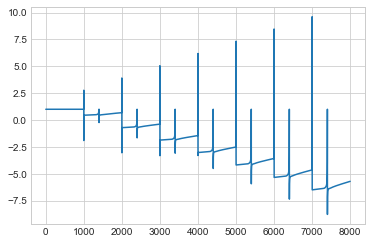

In [193]:
plt.plot(np.abs(diags[1][1:-1]) - (np.abs(diags[0][:-1]) + np.abs(diags[2][1:])))